Using cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
df_clean = pd.read_csv("wec_2_cleaned_energy_data.csv")

print(df_clean.head())

       country  year iso_code  population           gdp  \
0  Afghanistan  2000      AFG  19542986.0  1.128379e+10   
1  Afghanistan  2001      AFG  19688634.0  1.102127e+10   
2  Afghanistan  2002      AFG  21000258.0  1.880487e+10   
3  Afghanistan  2003      AFG  22645136.0  2.107434e+10   
4  Afghanistan  2004      AFG  23553554.0  2.233257e+10   

   biofuel_cons_change_pct  biofuel_cons_change_twh  biofuel_cons_per_capita  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   biofuel_consumption  biofuel_elec_per_capita  ...  fossil_consumption  \
0                  0.0                      0.0  ...                 0.0   
1           

In [3]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4902.0,2.010760e+03,6.497050e+00,2.000000e+03,2.005000e+03,2.011000e+03,2.016000e+03,2.022000e+03
population,4902.0,3.297822e+07,1.308339e+08,1.833000e+03,7.776128e+05,5.854991e+06,2.150407e+07,1.425894e+09
gdp,4902.0,3.505497e+11,1.372390e+12,3.128536e+08,4.041897e+10,4.041897e+10,1.423030e+11,1.815160e+13
biofuel_cons_change_pct,4902.0,1.334949e+01,1.635669e+02,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.659328e+03
biofuel_cons_change_twh,4902.0,2.155510e-01,2.380860e+00,-3.754900e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.087500e+01
...,...,...,...,...,...,...,...,...
hydro_share,4902.0,3.221077e-02,8.810693e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.033389e-02,7.223864e-01
solar_share,4902.0,1.372243e-03,5.548544e-03,0.000000e+00,0.000000e+00,0.000000e+00,4.679544e-06,7.586371e-02
wind_share,4902.0,4.330021e-03,1.692829e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.726126e-05,2.615670e-01
renewables_per_capita,4902.0,2.211441e-06,1.073699e-05,0.000000e+00,0.000000e+00,0.000000e+00,5.905396e-07,1.516516e-04


In [4]:
df_clean.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Columns: 140 entries, country to fossil_per_capita
dtypes: float64(136), int64(1), object(3)
memory usage: 5.2+ MB


In [5]:
df_clean.nunique()

country                   220
year                       23
iso_code                  219
population               4890
gdp                      3128
                         ... 
hydro_share              1611
solar_share              1283
wind_share               1393
renewables_per_capita    1639
fossil_per_capita        1818
Length: 140, dtype: int64

Global Trends Over Time

<Axes: title={'center': 'Global Primary Energy Consumption'}, xlabel='year'>

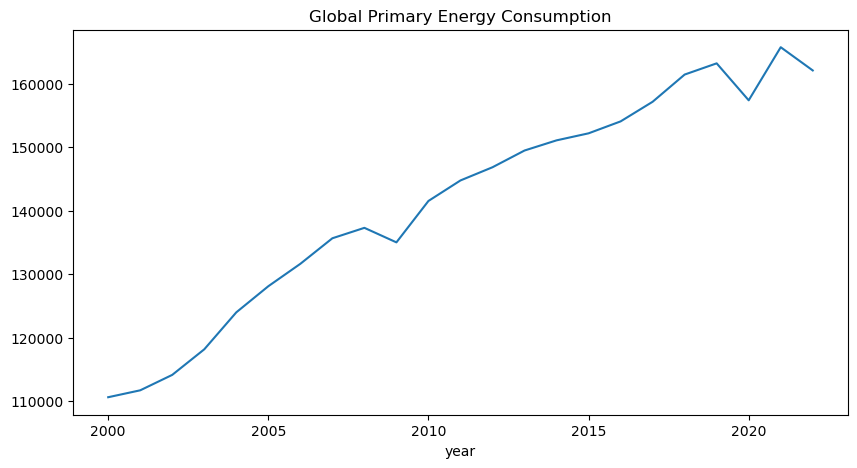

In [ ]:
global_trend = df_clean.groupby("year")["primary_energy_consumption"].sum()
global_trend.plot(kind="line", figsize=(10,5), title="Global Primary Energy Consumption")

Fossil vs Renewables Over Time

<Axes: title={'center': 'Fossil vs Renewable Energy Over Time'}, xlabel='year'>

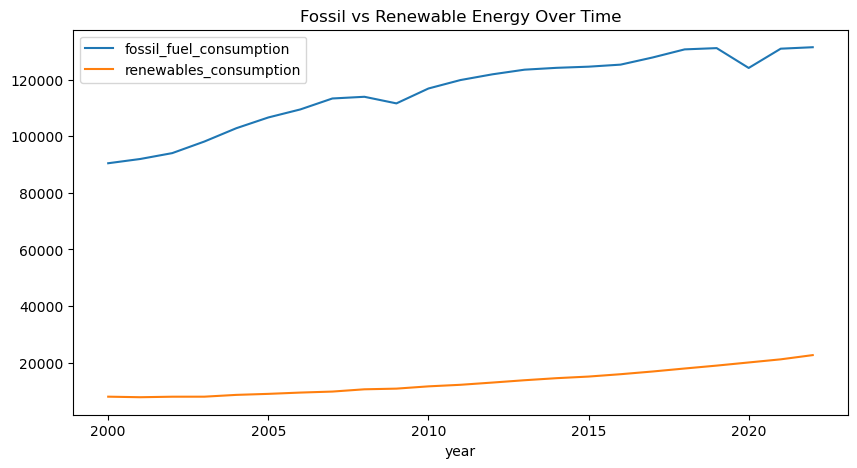

In [7]:
mix = df_clean.groupby("year")[["fossil_fuel_consumption","renewables_consumption"]].sum()
mix.plot(figsize=(10,5), title="Fossil vs Renewable Energy Over Time")

Regional Differences

<Axes: xlabel='year', ylabel='primary_energy_consumption'>

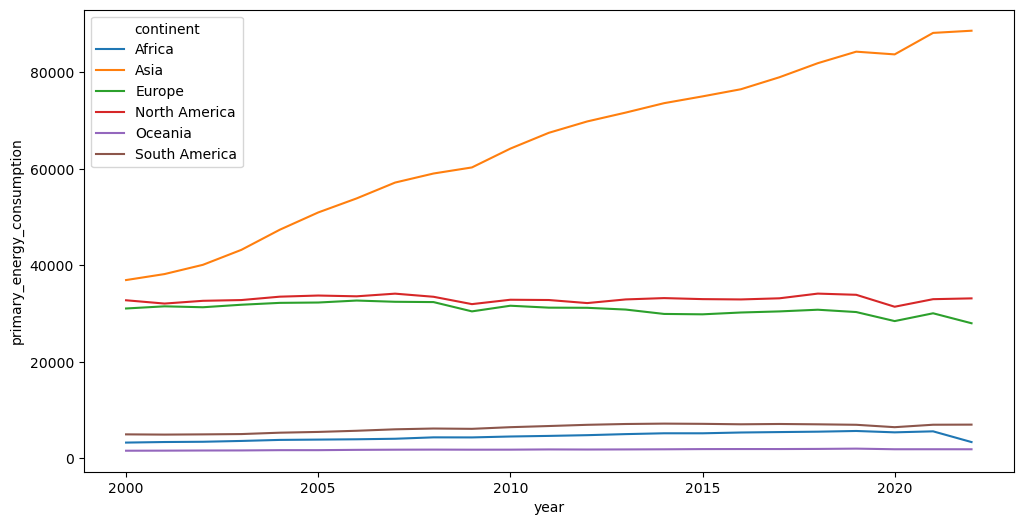

In [8]:
regional = df_clean.groupby(["continent","year"])["primary_energy_consumption"].sum().reset_index()
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=regional, x="year", y="primary_energy_consumption", hue="continent")

Energy Growth Rates

In [10]:
df_clean["energy_growth"] = df_clean.groupby("country")["primary_energy_consumption"].pct_change() * 100
df_clean.groupby("continent")["energy_growth"].mean().sort_values()

continent
South America    1.417575
Oceania          1.897117
Asia             3.287407
Africa           4.048750
Europe                inf
North America         inf
Name: energy_growth, dtype: float64

Renewable Leaders vs Laggards

In [13]:
renewable_trends = df_clean.groupby("country")["renewables_share_energy"].mean().sort_values(ascending=False)
print("\nTop 10 Renewable Leaders (avg % share):")
print(renewable_trends.head(10))
print("\nBottom 10 Renewable Laggards (avg % share):")
print(renewable_trends.tail(10))


Top 10 Renewable Leaders (avg % share):
country
Norway         68.881783
Brazil         43.023696
Sweden         39.956522
New Zealand    37.176826
Austria        32.873870
Switzerland    31.138696
Colombia       30.312565
Peru           30.076609
Canada         28.786217
Venezuela      23.908870
Name: renewables_share_energy, dtype: float64

Bottom 10 Renewable Laggards (avg % share):
country
Jordan           0.0
Guam             0.0
Guatemala        0.0
Guinea           0.0
Guinea-Bissau    0.0
Guyana           0.0
Haiti            0.0
Honduras         0.0
Jamaica          0.0
Zimbabwe         0.0
Name: renewables_share_energy, dtype: float64


Fossil Dependence Risks

In [14]:
fossil_dependent = df_clean[df_clean["fossil_share_energy"] > 80]
high_fossil = fossil_dependent.groupby("country")["fossil_share_energy"].mean().sort_values(ascending=False)
print("\nCountries Highly Dependent on Fossil Fuels (>80%):")
print(high_fossil.head(10))



Countries Highly Dependent on Fossil Fuels (>80%):
country
Trinidad and Tobago    99.993077
Hong Kong              99.866133
Algeria                99.806870
Belarus                99.266870
Bangladesh             99.032565
Israel                 98.712000
Iraq                   98.617000
Iran                   98.310391
Uzbekistan             96.878739
South Africa           96.389435
Name: fossil_share_energy, dtype: float64


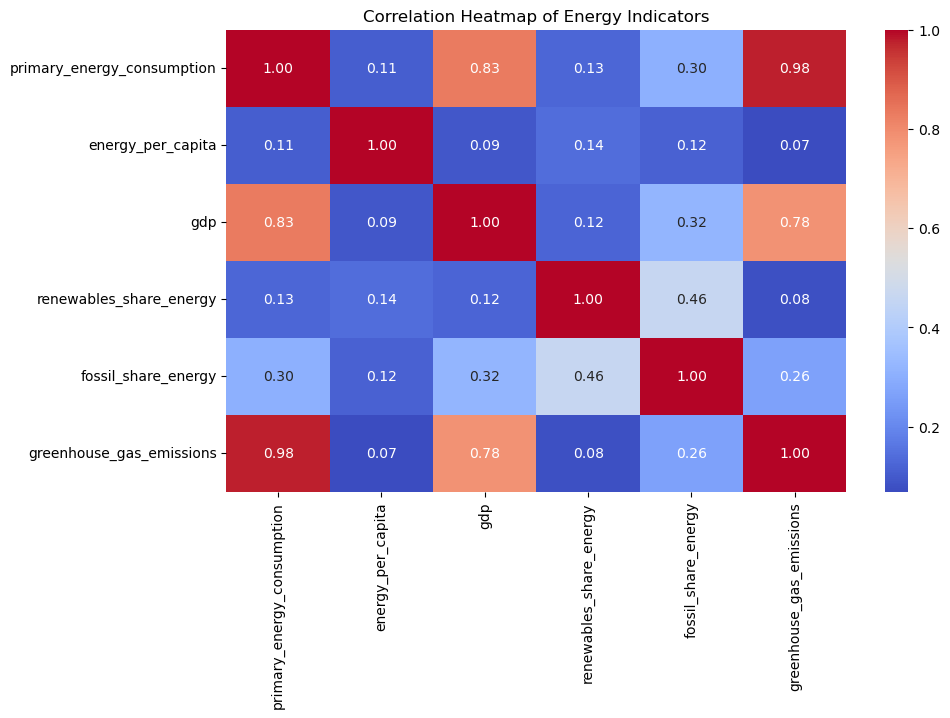

In [15]:
corr_cols = ["primary_energy_consumption","energy_per_capita","gdp",
             "renewables_share_energy","fossil_share_energy","greenhouse_gas_emissions"]

plt.figure(figsize=(10,6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Energy Indicators")
plt.show()


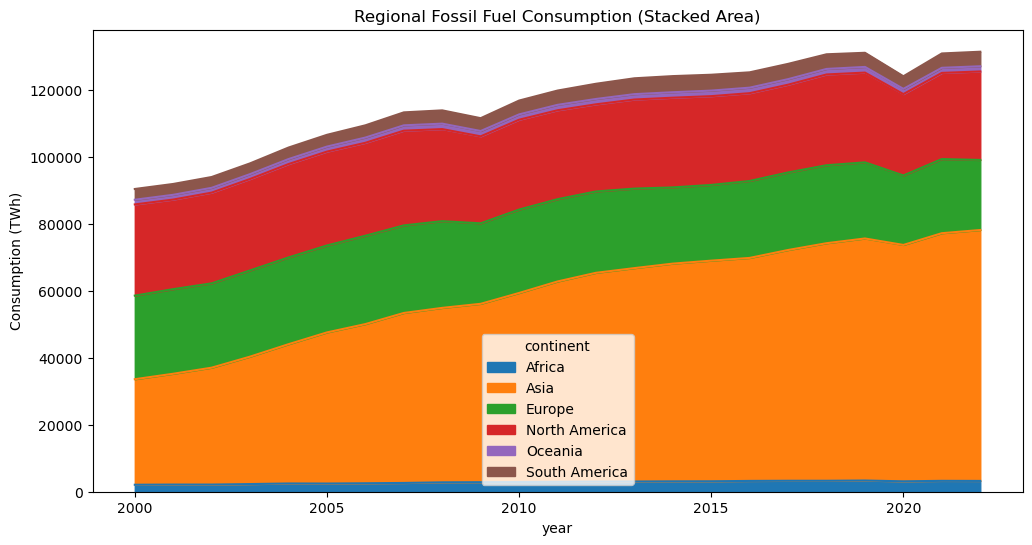

In [16]:
energy_mix = df_clean.groupby(["year","continent"])[["fossil_fuel_consumption","renewables_consumption","nuclear_consumption"]].sum().reset_index()
energy_mix_pivot = energy_mix.pivot(index="year", columns="continent", values="fossil_fuel_consumption")

energy_mix_pivot.plot(figsize=(12,6), kind="area", stacked=True)
plt.title("Regional Fossil Fuel Consumption (Stacked Area)")
plt.ylabel("Consumption (TWh)")
plt.show()